<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Problem Statement 
    
The dataset given is about the Health and economic conditions in different States of a country. Group States based on how similar their situation is, so as to provide these groups to the government such that appropriate measures can be taken to escalate their Health and Economic conditions. 
 

 
 
Data Dictionary for State_wise_Health_income: 

 1. **States**- names of States  
 2. **Health_indeces1**: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.  
 3. **Health_indeces2**: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States.  
 4. **Per_capita_income**-Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.  
 5. **GDP**: GDP provides an economic snapshot of a country/State, used to estimate the size of an economy and growth rate. 
 
 
Dataset for Problem 1: State_wise_Health_income.csv 

**Import all the required packages**

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read the Dataset**
    


In [2]:
df = pd.read_csv('State_wise_Health_income.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 1

**Check for the significance of the columns in this clustering exercise. Drop the columns which are not significant,if any.**


In [3]:
dataset = df.copy()

In [4]:
dataset.head()

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [5]:
dataset = dataset.drop(['Unnamed: 0','States'], axis=1)

In [6]:
dataset.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP
0,417,66,564,1823
1,1485,646,2710,73662
2,654,299,1104,27318
3,192,25,573,250
4,43,8,528,22


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 2

**Check the various data types present in the data,whether there are null values present and the shape of the data. Also, check the basic measures of descriptive statistics of the data.**


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indices1    296 non-null    int64
 1   Health_indices2    296 non-null    int64
 2   Per_capita_income  296 non-null    int64
 3   GDP                296 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB
None


In [8]:
dataset.isnull().sum()

Health_indices1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [9]:
dataset.shape

(296, 4)

In [10]:
dataset.describe()

,Health_indices1,Health_indices2,Per_capita_income,GDP
count,296.000000,296.000000,296.000000,296.000000
mean,2629.195946,693.594595,2159.597973,174717.050676
std,2041.890970,469.738035,1493.663013,167439.128587
min,-10.000000,0.000000,500.000000,22.000000
25%,640.000000,173.500000,746.000000,8679.500000
50%,2446.500000,810.500000,1869.000000,135748.500000
75%,4102.750000,1076.000000,3138.750000,314751.250000
max,10219.000000,1508.000000,7049.000000,728575.000000


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 3
    
**Do you think scaling is necessary here. If Yes, scale the data using StandardScaler or ZScore Scaling.**


Yes, scaling is required in this data set as all features have different weights and to ensure that none of the feature is identified as important only because of the weight, scaling is mandatory for this data set

In [11]:
## Scaling the data using the ZScore Scaling function

from scipy.stats import zscore

#apply the scaler to the data:
df_scaled =  dataset.apply(zscore)
df_scaled.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP
0,-1.085240,-1.338315,-1.070054,-1.034327
1,-0.561310,-0.101493,0.369115,-0.604555
2,-0.968975,-0.841454,-0.707914,-0.881805
3,-1.195619,-1.425745,-1.064018,-1.043738
4,-1.268714,-1.461997,-1.094197,-1.045102


In [12]:
## Scaling the data using the StandardScaler function

from sklearn.preprocessing import StandardScaler
X = StandardScaler()

#assign scaler to column:
df_scaled =  X.fit_transform(dataset)
df_scaled = pd.DataFrame(df_scaled,columns=dataset.columns)
df_scaled.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP
0,-1.085240,-1.338315,-1.070054,-1.034327
1,-0.561310,-0.101493,0.369115,-0.604555
2,-0.968975,-0.841454,-0.707914,-0.881805
3,-1.195619,-1.425745,-1.064018,-1.043738
4,-1.268714,-1.461997,-1.094197,-1.045102


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 4

**Apply hierarchical clustering to the scaled data using Euclidean distance and 'Ward's' linkage method. Identify the number of optimum clusters using Dendrogram and describe a reason for selecting the number of optimum clusters.**

In [13]:
import scipy.cluster.hierarchy as shc

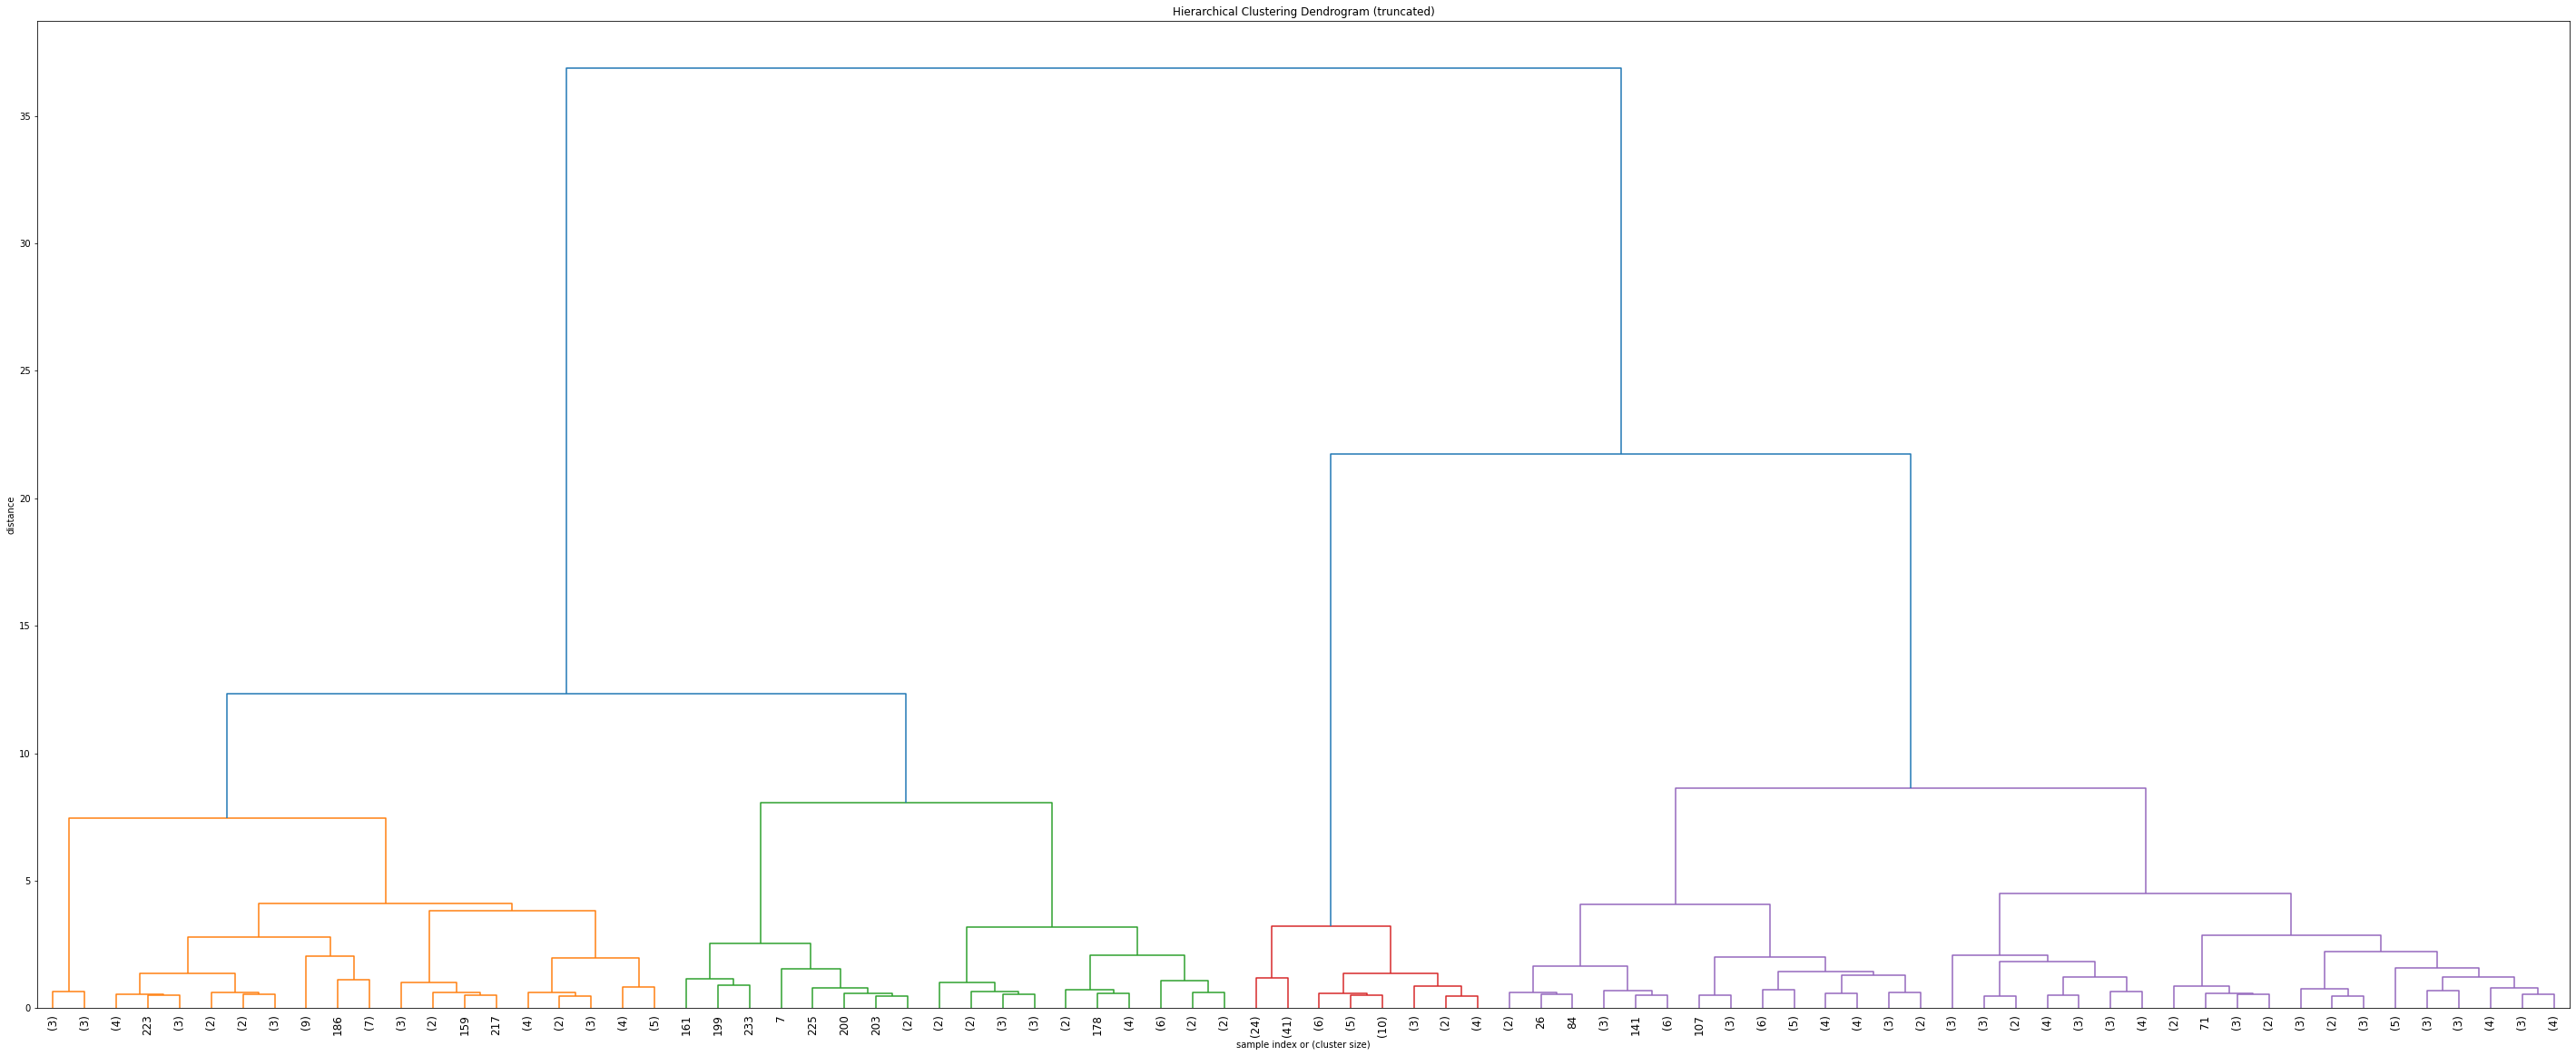

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(df_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

Government would like know more than “good” and “not so good” states and hence more insight we are able to generate with more than 2 clusters, better it is for the business. 
Hence let’s consider 4 clusters and plot the clusters to confirm if the derived clusters are providing the required segmentation details. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 5

**With the optimum clusters apply  agglomerative clustering and predict clusters for the given dataset**

In [15]:
#Method 1

clusters_1 = shc.fcluster(shc.linkage(df_scaled, method='ward'), 4, criterion='maxclust')# Here 4 is number of clusters we want
clusters_1


array([3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 4, 3,
       3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 4, 3, 3, 4, 4, 3, 3, 1, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3,
       3, 2, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 1, 3, 4, 3, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [16]:
## Method 2

clusters_2 = shc.fcluster(shc.linkage(df_scaled, method='ward'),10 , criterion='distance')# here 10 is the value of color_threshold in the dendrogram
clusters_2


array([3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 4, 3,
       3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 4, 3, 3, 4, 4, 3, 3, 1, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3,
       3, 2, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 1, 3, 4, 3, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 6

**Profile these clusters derived from Hierarchical clustering with respect to the means of each variables used in clustering.**

In [17]:
dataset['cluster_1']= clusters_1
dataset['cluster_2']= clusters_2
dataset.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP,cluster_1,cluster_2
0,417,66,564,1823,3,3
1,1485,646,2710,73662,4,4
2,654,299,1104,27318,3,3
3,192,25,573,250,3,3
4,43,8,528,22,3,3


In [18]:
df1 = dataset.drop(['cluster_2'],axis=1)
df_clust_1 = df1.groupby('cluster_1').mean()
cluster_1_freq = dataset['cluster_1'].value_counts().sort_index()
df_clust_1['cluster count'] = cluster_1_freq
df_clust_1

,Health_indices1,Health_indices2,Per_capita_income,GDP,cluster count
cluster_1,,,,,
1,4796.174603,1129.936508,2419.746032,382809.936508,63
2,5146.444444,1327.138889,5047.083333,367196.916667,36
3,401.063158,104.536842,680.673684,5388.768421,95
4,2477.549020,749.117647,2357.235294,135962.735294,102


In [19]:
df2 = dataset.drop(['cluster_1'],axis=1)
df_clust_2 = df2.groupby('cluster_2').mean()
cluster_2_freq = dataset['cluster_2'].value_counts().sort_index()
df_clust_2['cluster count'] = cluster_2_freq
df_clust_2

,Health_indices1,Health_indices2,Per_capita_income,GDP,cluster count
cluster_2,,,,,
1,4796.174603,1129.936508,2419.746032,382809.936508,63
2,5146.444444,1327.138889,5047.083333,367196.916667,36
3,401.063158,104.536842,680.673684,5388.768421,95
4,2477.549020,749.117647,2357.235294,135962.735294,102


The clusters derived from above two different methods are the same.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 7

**Apply K-Means clustering on scaled data and determine optimum clusters by applying the elbow curve.**

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [21]:
# The below code snippet is used to print the WSS values. We have passed it through a loop to make understand the values
# of WSS better.

for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 467.3518002848113
The WSS value for 3 clusters is 259.2278544455929
The WSS value for 4 clusters is 182.454671740563
The WSS value for 5 clusters is 149.30635806594063
The WSS value for 6 clusters is 116.91437829406928
The WSS value for 7 clusters is 90.38643890433259
The WSS value for 8 clusters is 79.35379745078147
The WSS value for 9 clusters is 71.15860225003033
The WSS value for 10 clusters is 63.7503855520213


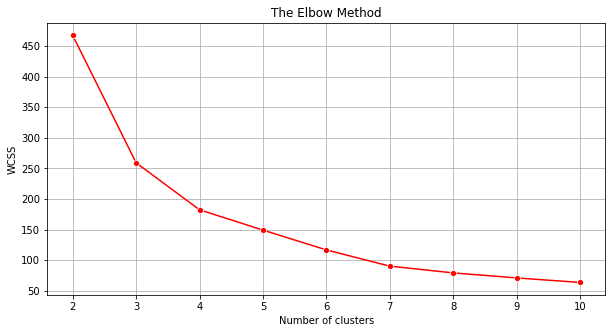

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set. 4 clusters were identified as an optimum number. 

In [23]:
k_means = KMeans(n_clusters = 4,random_state=42)
k_means.fit(df_scaled)
labels_4 = k_means.labels_
labels_4

array([0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 0, 2, 2, 0, 0, 2, 2, 0, 0, 3, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 3, 0, 2, 0, 1, 3, 3, 3,
       3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 1, 1, 3, 3, 3, 2, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3,
       1, 1, 1, 3, 1, 1, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Let's try for clusters = 3

In [24]:
k_means = KMeans(n_clusters = 3,random_state=42)
k_means.fit(df_scaled)
labels_3 = k_means.labels_
labels_3

array([0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Both hierarchical clustering and k-means have provided good segmentation and either one can be used to define strategies. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 8

**Profile these clusters derived from KMeans clustering with respect to the means of each variables used in clustering.**

In [25]:
dataset['kmeans_cluster_4']= labels_4
dataset['kmeans_cluster_3']= labels_3
dataset.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP,cluster_1,cluster_2,kmeans_cluster_4,kmeans_cluster_3
0,417,66,564,1823,3,3,0,0
1,1485,646,2710,73662,4,4,2,2
2,654,299,1104,27318,3,3,0,0
3,192,25,573,250,3,3,0,0
4,43,8,528,22,3,3,0,0


In [36]:
pd.crosstab(dataset['kmeans_cluster_3'],dataset['kmeans_cluster_4'])

kmeans_cluster_4,0,1,2,3
kmeans_cluster_3,,,,
0,101,0,0,0
1,0,36,0,59
2,0,0,100,0


In [26]:
df_kmeans_3 = dataset.drop(['cluster_1','cluster_2','kmeans_cluster_4'],axis=1)
df_kclust_3 = df_kmeans_3.groupby('kmeans_cluster_3').mean()
cluster_3_freq = dataset['kmeans_cluster_3'].value_counts().sort_index()
df_kclust_3['cluster count'] = cluster_3_freq
df_kclust_3

,Health_indices1,Health_indices2,Per_capita_income,GDP,cluster count
kmeans_cluster_3,,,,,
0,499.158416,116.356436,693.772277,9428.099010,101
1,4930.884211,1212.336842,3385.852632,385648.589474,95
2,2593.930000,783.800000,2475.140000,141273.930000,100


In [27]:
df_kmeans_4 = dataset.drop(['cluster_1','cluster_2','kmeans_cluster_3'],axis=1)
df_kclust_4 = df_kmeans_4.groupby('kmeans_cluster_4').mean()
cluster_4_freq = dataset['kmeans_cluster_4'].value_counts().sort_index()
df_kclust_4['cluster count'] = cluster_4_freq
df_kclust_4

,Health_indices1,Health_indices2,Per_capita_income,GDP,cluster count
kmeans_cluster_4,,,,,
0,499.158416,116.356436,693.772277,9428.099010,101
1,5146.444444,1327.138889,5047.083333,367196.916667,36
2,2593.930000,783.800000,2475.140000,141273.930000,100
3,4799.355932,1142.288136,2372.220339,396907.237288,59


Final number of clusters is 4

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Q 9

**Add the optimum clusters derived from Hierarchical Clustering and KMeans clustering to the original data and export it to a '.csv' file.**

In [28]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [29]:
labels_4.shape

(296,)

In [30]:
df.shape

(296, 5)

In [31]:
df['Hierarchical Clustering Clusters'] = clusters_2
df['KMeans Clustering Clusters'] = labels_4
df.head()

,States,Health_indices1,Health_indices2,Per_capita_income,GDP,Hierarchical Clustering Clusters,KMeans Clustering Clusters
0,Bachevo,417,66,564,1823,3,0
1,Balgarchevo,1485,646,2710,73662,4,2
2,Belasitsa,654,299,1104,27318,3,0
3,Belo_Pole,192,25,573,250,3,0
4,Beslen,43,8,528,22,3,0


In [32]:
df.to_csv('Clustering.csv')

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_score(df_scaled, labels = labels_3)

0.5335290534127187

In [35]:
silhouette_score(df_scaled, labels = labels_4)

0.552254846560196

# END